In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [ ]:
act = 'stand'
file = pd.read_csv(f'../Data/Raw Data/{act}.csv')
file.head()

,mac,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_54,_55,_56,_57,_58,_59,_60,_61,_62,_63
0,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(790-833j),(210-1062j),(-395-946j),(-892-379j),...,(642+74j),(612-334j),(313-675j),(-207-734j),(-631-426j),(-791-58j),(10245+0j),(-12544-32640j),(128+0j),(1719-3250j)
1,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-715+34j),(-660+334j),(-479+583j),(-123+707j),...,(-164-464j),(-352-397j),(-499-241j),(-564-8j),(-505+234j),(-323+376j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
2,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-598-579j),(-679-404j),(-717-218j),(-715+39j),...,(344+354j),(429+295j),(509+201j),(561+57j),(559-110j),(534-253j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
3,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-845-123j),(-788+139j),(-661+359j),(-410+583j),...,(175+459j),(322+416j),(465+298j),(555+105j),(556-124j),(515-312j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
4,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-731+278j),(-632+446j),(-501+581j),(-286+682j),...,(460+14j),(511-70j),(531-182j),(501-317j),(409-442j),(290-527j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)


In [5]:
def amplitude_only(file):
    amplitudes = pd.DataFrame()
    
    for col in file.columns[2:]:
        complex_num = file[col].apply(lambda x: complex(x.strip("()")))
        amplitudes[col] = np.abs(complex_num)
    
    return amplitudes

In [6]:
amp = amplitude_only(file)
amp.head()

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9,...,_54,_55,_56,_57,_58,_59,_60,_61,_62,_63
0,2048.000244,6476.660945,10137.789947,5221.395982,1148.037020,1082.563624,1025.154135,969.177486,913.777325,845.681973,...,646.250725,697.208721,744.038977,762.630317,761.338952,793.123572,10245.0,34967.435365,128.0,3676.609987
1,2048.000244,6476.660945,10137.789947,5221.395982,715.807935,739.699939,754.539595,717.619676,664.605898,616.280780,...,492.130064,530.577987,554.149799,564.056735,556.579734,495.686393,10245.0,34876.418165,128.0,3676.609987
2,2048.000244,6476.660945,10137.789947,5221.395982,832.373113,790.099361,749.408433,716.062846,656.629271,613.931592,...,493.611183,520.639991,547.249486,563.888287,569.720107,590.901853,10245.0,34876.418165,128.0,3676.609987
3,2048.000244,6476.660945,10137.789947,5221.395982,853.905147,800.165608,752.198112,712.733471,662.589617,617.370229,...,491.229071,526.060833,552.294306,564.845112,569.659547,602.137028,10245.0,34876.418165,128.0,3676.609987
4,2048.000244,6476.660945,10137.789947,5221.395982,782.077362,773.524402,767.177945,739.540398,717.958912,672.595718,...,460.212994,515.772237,561.324327,592.865921,602.200133,601.522236,10245.0,34876.418165,128.0,3676.609987


In [11]:
def remove_subcarrier(amplitude):
    columns_to_remove = ['_0', '_1', '_2', '_3', '_32', '_61', '_62', '_63', '_11', '_25', '_39', '_53']
    
    return amplitude.drop(columns=columns_to_remove)

In [12]:
rem = remove_subcarrier(amp)
rem.head()

KeyError: "['_0', '_1', '_2', '_3', '_32', '_61', '_62', '_63', '_11', '_25', '_39', '_53'] not found in axis"

In [ ]:
def readamp(removed):

    # converts element of dataframe to numeric value and due to 'coerece' non-numeric values is converted to NaN
    df = removed.apply(pd.to_numeric, errors='coerce')
    
    df = np.nan_to_num(df) # NaN is replaced with 0

    dfs = df[:, :]

    return dfs

In [ ]:
amplitude = readamp(rem)
amplitude

array([[ 1148.03702031,  1082.563624  ,  1025.15413475, ...,
          761.33895211,   793.12357171, 10245.        ],
       [  715.80793513,   739.69993916,   754.53959472, ...,
          556.57973373,   495.68639279, 10245.        ],
       [  832.37311345,   790.09936084,   749.40843337, ...,
          569.72010672,   590.9018531 , 10245.        ],
       ...,
       [ 1038.55524648,  1039.27137938,  1016.09645211, ...,
         1176.05527081,  1186.31235347, 33356.58933404],
       [ 1043.88696706,  1039.72400184,  1020.68310459, ...,
         1174.82424217,  1183.56453141, 33356.58933404],
       [ 1048.83411462,  1036.92815566,  1021.5659548 , ...,
         1181.18584482,  1184.39604863, 33356.58933404]])

In [ ]:
def hampel(removed, k=5, t0=123, outliers_return=False):
    

    values = pd.Series(removed.copy())

    # Hampel Filter
    L = 1.4826

    rolling_median = values.rolling(k).median()
    difference = np.abs(rolling_median - values)
    median_abs_deivation = difference.rolling(k).median()

    threshold = t0 * L * median_abs_deivation
    outlier_idx = difference > threshold
    values[outlier_idx] = rolling_median

    if outliers_return:
        return values, outlier_idx

    return values

In [ ]:
def dwt(hampeled, t1=0.19):
    threshold = t1

    hamp = hampeled.copy()

    window = pywt.Wavelet('sym5')
    max_level = pywt.dwt_max_level(hamp.shape[0], window.dec_len)

    coeffs = pywt.wavedec(hamp, 'sym5', level=max_level)

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

    denoise = pywt.waverec(coeffs, 'sym5')

    return denoise

In [ ]:
def filter(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = dwt(hampel(numeric[:, i], k=5, t0=3), t1=0.2)[:data] # replaces filtered data in same column
    
    return res

In [14]:
act = 'jump'

amplitude = pd.read_csv('../FYP_Data/Dataset/jump1_data.csv').to_numpy()

filtered = filter(amplitude)
filtered

array([[12.20909935, 11.2763786 , 11.54961481, ..., 77.94681416,
        76.20269067, 75.78279295],
       [11.9765179 , 11.08730905, 11.32319725, ..., 75.89542686,
        74.51342259, 74.2545683 ],
       [12.11105771, 10.93726668, 11.05265252, ..., 74.14603893,
        72.88580488, 72.3642882 ],
       ...,
       [11.41920381, 11.32656529, 10.76248488, ..., 41.90276422,
        38.39071935, 39.40966656],
       [10.23326501, 11.50014156, 10.8042071 , ..., 64.19903725,
        38.95798684, 39.67450135],
       [ 9.82780724,  9.78996481, 10.84916559, ..., 68.81392136,
        61.4154165 , 54.88793154]])

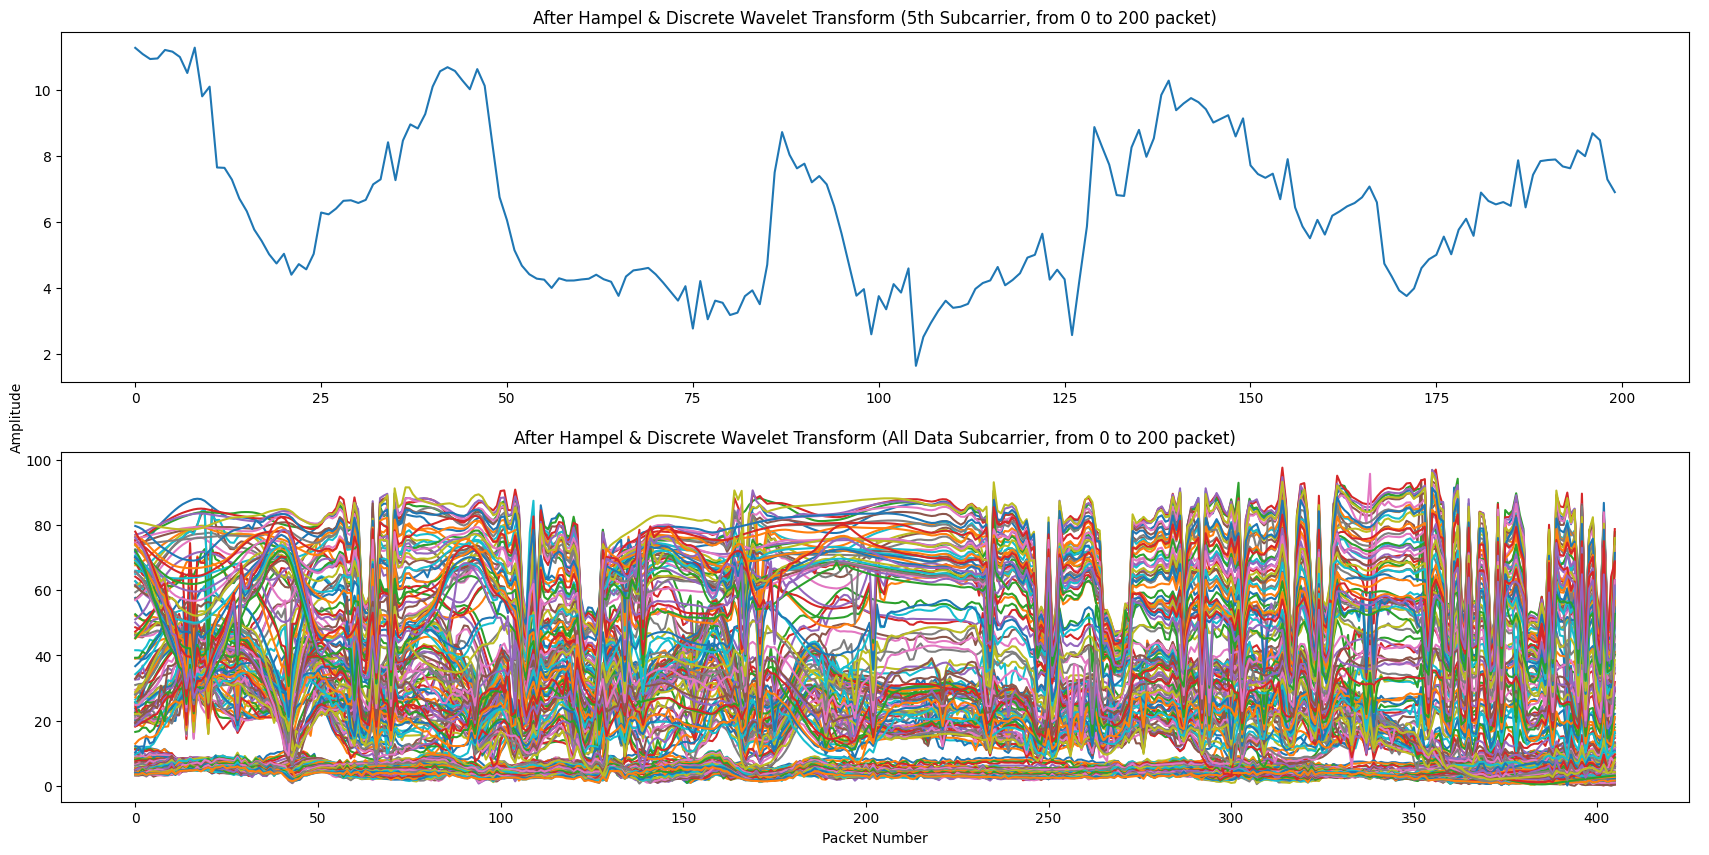

In [26]:
fig = plt.figure(figsize = (21,10))
ax = fig.add_subplot(111)

no_filter = amplitude
with_filter = filter(no_filter)

ax3 = fig.add_subplot(211)
plt.plot((with_filter)[:200, 1])
ax3.set_title("After Hampel & Discrete Wavelet Transform (5th Subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot((with_filter)[:, :-1])
ax4.set_title("After Hampel & Discrete Wavelet Transform (All Data Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('Amplitude')
ax.set_xlabel('Packet Number')

plt.show()

In [17]:
processed = pd.DataFrame(filtered)
processed.head()


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,12.209099,11.276379,11.549615,11.172372,10.161895,9.601277,9.195696,8.624752,8.580921,8.273106,...,65.686067,65.779086,68.940920,69.091574,70.094976,74.082208,72.265176,77.946814,76.202691,75.782793
1,11.976518,11.087309,11.323197,10.950614,9.843584,9.407029,8.993807,8.631645,8.471141,8.093958,...,64.606580,64.701360,67.926006,67.926853,68.803107,72.562008,70.354826,75.895427,74.513423,74.254568
2,12.111058,10.937267,11.052653,10.804517,10.579411,9.247633,9.295841,8.320927,8.403870,8.484417,...,63.166471,63.326374,66.601009,66.302692,67.078245,70.912162,68.237342,74.146039,72.885805,72.364288
3,11.452731,10.954665,10.889368,10.647593,9.334035,9.157321,8.737334,8.153820,8.403811,7.849794,...,61.007695,61.375376,64.670621,63.876292,64.412077,69.244715,65.186936,71.908099,70.391733,69.686522
4,11.576701,11.212359,11.492309,11.099871,10.270231,9.909252,9.844884,9.046314,8.927464,8.571539,...,58.090717,58.812563,62.246344,60.649196,60.996904,67.688350,61.273271,69.488547,67.277666,66.160284


In [18]:
processed['activity'] = act
processed.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,activity
0,12.209099,11.276379,11.549615,11.172372,10.161895,9.601277,9.195696,8.624752,8.580921,8.273106,...,65.779086,68.940920,69.091574,70.094976,74.082208,72.265176,77.946814,76.202691,75.782793,jump
1,11.976518,11.087309,11.323197,10.950614,9.843584,9.407029,8.993807,8.631645,8.471141,8.093958,...,64.701360,67.926006,67.926853,68.803107,72.562008,70.354826,75.895427,74.513423,74.254568,jump
2,12.111058,10.937267,11.052653,10.804517,10.579411,9.247633,9.295841,8.320927,8.403870,8.484417,...,63.326374,66.601009,66.302692,67.078245,70.912162,68.237342,74.146039,72.885805,72.364288,jump
3,11.452731,10.954665,10.889368,10.647593,9.334035,9.157321,8.737334,8.153820,8.403811,7.849794,...,61.375376,64.670621,63.876292,64.412077,69.244715,65.186936,71.908099,70.391733,69.686522,jump
4,11.576701,11.212359,11.492309,11.099871,10.270231,9.909252,9.844884,9.046314,8.927464,8.571539,...,58.812563,62.246344,60.649196,60.996904,67.688350,61.273271,69.488547,67.277666,66.160284,jump


In [19]:
act_data = processed.iloc[:, :-1]
act_label = processed.iloc[:, -1]

In [20]:
act_data.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,12.209099,11.276379,11.549615,11.172372,10.161895,9.601277,9.195696,8.624752,8.580921,8.273106,...,65.686067,65.779086,68.940920,69.091574,70.094976,74.082208,72.265176,77.946814,76.202691,75.782793
1,11.976518,11.087309,11.323197,10.950614,9.843584,9.407029,8.993807,8.631645,8.471141,8.093958,...,64.606580,64.701360,67.926006,67.926853,68.803107,72.562008,70.354826,75.895427,74.513423,74.254568
2,12.111058,10.937267,11.052653,10.804517,10.579411,9.247633,9.295841,8.320927,8.403870,8.484417,...,63.166471,63.326374,66.601009,66.302692,67.078245,70.912162,68.237342,74.146039,72.885805,72.364288
3,11.452731,10.954665,10.889368,10.647593,9.334035,9.157321,8.737334,8.153820,8.403811,7.849794,...,61.007695,61.375376,64.670621,63.876292,64.412077,69.244715,65.186936,71.908099,70.391733,69.686522
4,11.576701,11.212359,11.492309,11.099871,10.270231,9.909252,9.844884,9.046314,8.927464,8.571539,...,58.090717,58.812563,62.246344,60.649196,60.996904,67.688350,61.273271,69.488547,67.277666,66.160284


In [21]:
act_label.head()

0    jump
1    jump
2    jump
3    jump
4    jump
Name: activity, dtype: object

In [22]:
act_data.to_csv(f'../Data/Processed/{act}_data.csv', index=False, header=False)
act_label.to_csv(f'../Data/Processed/{act}_label.csv', index=False, header=False)

In [23]:
print(f'Saved {act}_data and {act}_label file')

Saved jump_data and jump_label file
